# Unsupervised learning - Clustering

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Measuring the similarity between two records

At the beginning, we are going to measure how two records are similar using the distance between them. For that, we use `cdist()` method given by `scipy` and we use it with several distance's measures:

In [2]:
from scipy.spatial.distance import cdist

In [3]:
# Calculate several distances between the points: [0,1] and [1,2]
print(cdist([[0,1]], [[1,2]], metric = 'euclidean'))        # Euclidean's distance
print(cdist([[0,1]], [[1,2]], metric = 'minkowski', p = 3)) # Minkowski's distance
print(cdist([[0,1]], [[1,2]], metric = 'cityblock'))        # Manhattan's distance
print(cdist([[0,1]], [[1,2]], metric = 'cosine'))           # Coseno's distance
print(cdist([[0,1]], [[1,2]], metric = 'correlation'))      # Correlation's distance
print(cdist([[0,1]], [[1,2]], metric = 'seuclidean'))       # Normalize euclidean's distance

[[ 1.41421356]]
[[ 1.25992105]]
[[ 2.]]
[[ 0.10557281]]
[[  1.11022302e-16]]
[[ 2.]]


### K-means algorithm 

The K-means algorithm is one of the clustering analysis techniques more used due to its easiness. This algorithm only needs a dataset for trainning and knows the amount of clusters in which the dataset will be divided. In   `scikit-learn`, two implementations of this algorithm exist, both of them in `sklearn.cluster`:

- `KMeans`, standard implementation which uses all data.
- `MiniBatchKMeans`, implementation which uses a subset of data for reducing the calculation's time. This implementation is appropiate for huge datasets.

In both implementations, the metric used is the euclidean metric.

For use the KMeans algorithm a dataset is needed, `scikit-learn` has several methods which make a clustering dataset for tests. All of them are in `sklearn.datasets` and we are going to use the `make_blobs()` method:

In [4]:
from sklearn.datasets import make_blobs

In [5]:
# Let's create two dataset: one of them the 3 clusters and the another one the 5 clusters

# blobs_3 -> dataset
# classes_3 -> vector with the cluster's id of each point
blobs_3, classes_3 = make_blobs(300,                 # amount of data
                                centers      = 3,    # amount of clusters
                                cluster_std   = 0.5,  # standard desviation of data
                                random_state = 1)    # seed of random generator

# blobs_5 -> dataset
# classes_5 -> vector with the cluster's id of each point
blobs_5, classes_5 = make_blobs(300,                 # amount of data
                                centers      = 5,    # amount of clusters
                                cluster_std   = 0.5,  # standard desviation of data
                                random_state = 1)    # seed of random generator


Once the datasets have been created, let's use `KMeans` algorithm (because ours datasets are small, we are going to use KMeans implementation):

In [6]:
from sklearn.cluster import KMeans 

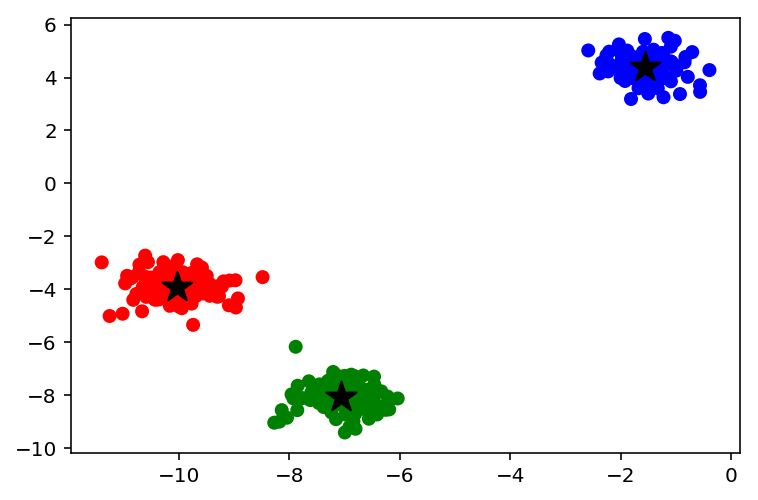

In [7]:
# Create a color map for display better the results
color_map = array(['b','g','r','c','m','y','k'])

# Create a KMeans object and train it
kmeans = KMeans(n_clusters = 3, # Let's use with 3 clusters
                random_state = 1).fit(blobs_3)

# Get the class of each record
classes = kmeans.predict(blobs_3)

# Display the results
scatter(blobs_3[:,0], 
        blobs_3[:,1], 
        color = color_map[classes])

# Display the center of each cluster
scatter(kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
        marker = '*',
        s = 250, # size of the clusters
        color = 'black')

It is more important that we indicate good the correct number of clusters when `KMeans` object is created. Let's see what happends when the number of clusters is not correct:

In [8]:
from sklearn.cluster import KMeans 

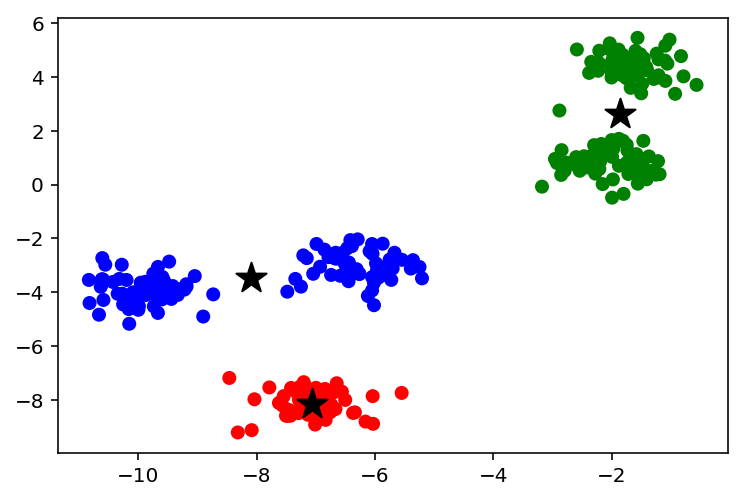

In [9]:
# Create a color map for display better the results
color_map = array(['b','g','r','c','m','y','k'])

# Create a KMeans object and train it
kmeans = KMeans(n_clusters = 3,                # Let's use with 3 clusters
                random_state = 1).fit(blobs_5) # above the dataset with 5 clusters

# Get the class of each record
classes = kmeans.predict(blobs_5)

# Display the results
scatter(blobs_5[:,0], 
        blobs_5[:,1], 
        color = color_map[classes])

# Display the center of each cluster
scatter(kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
        marker = '*',
        s = 250, # size of the clusters
        color = 'black')

In [10]:
from sklearn.cluster import KMeans 

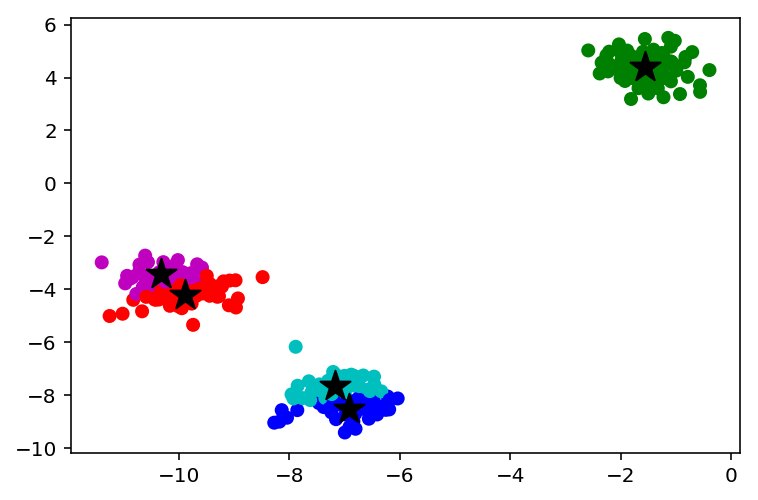

In [11]:
# Create a color map for display better the results
color_map = array(['b','g','r','c','m','y','k'])

# Create a KMeans object and train it
kmeans = KMeans(n_clusters = 5,                # Let's use with 5 clusters
                random_state = 1).fit(blobs_3) # above the dataset with 3 clusters

# Get the class of each record
classes = kmeans.predict(blobs_3)

# Display the results
scatter(blobs_3[:,0], 
        blobs_3[:,1], 
        color = color_map[classes])

# Display the center of each cluster
scatter(kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
        marker = '*',
        s = 250, # size of the clusters
        color = 'black')

As we can observe, the algorithm don't select the clusters correctly. So, the number of clusters identification is more important.

### Number of clusters identification in a dataset

When data are in bidimensionals or tridimensionals spaces, the number of clusters identification can be through a visual representation. But, when they aren't, other techniques are needed like the dispersion or the Silhouette methods:

#### Dispersion method

With this method, the mean distorsion between clusters is calculated, which is the mean distance of the centroide to cluster's points. This method is implemented like this: 

In [12]:
# x           -> data
# figure_name -> figure name
# max_k       -> maximum of clusters
# n_init      -> maximum number which the algorithm will be executed
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    from sklearn.cluster import KMeans 
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plot(range(1, max_k), inertia, 'bx-')
    xlabel('k')
    title(figure_name)

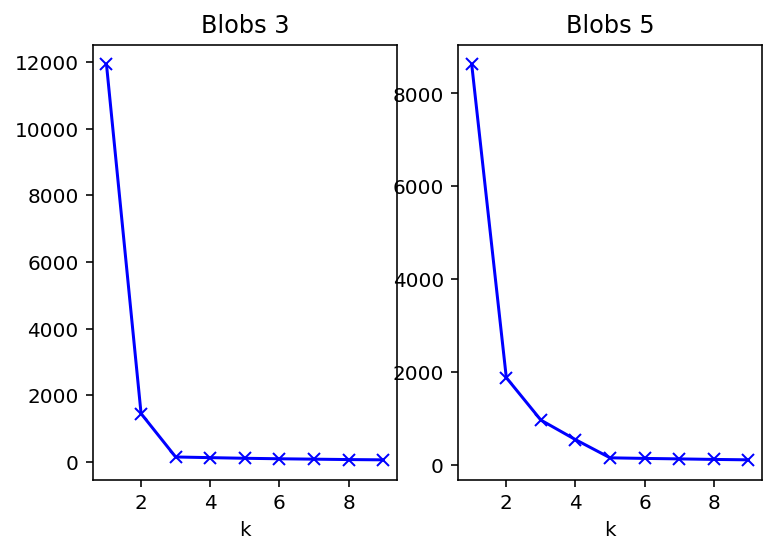

In [13]:
subplot(1, 2, 1)
plot_dispersion(blobs_3, 'Blobs 3')
subplot(1, 2, 2)
plot_dispersion(blobs_5, 'Blobs 5')

#### Silhouette method

When the clusters are not good separated, the distorsion method is not good. In these cases, is better to use the Silhouette method. The Silhouette coefficient is defined like the difference between mean distance to closest cluster's elements ($b$) and mean intra-cluster distance of the cluster's element ($a$) divide by the maximum of them, that is to say:

$$ s = \frac{b - a}{\max(a,b)}$$

The Silhouette coefficient is implemented in `sklearn.metrics` with the `silhouette_score()` method. The implementation of this method is the following:

In [14]:
# blobs       -> data
# figure_name -> figure name
# max_k       -> maximum of clusters
# n_init      -> maximum number which the algorithm will be executed
def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    from sklearn.metrics import silhouette_score
    
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    xlabel('k')
    title(figure_name)

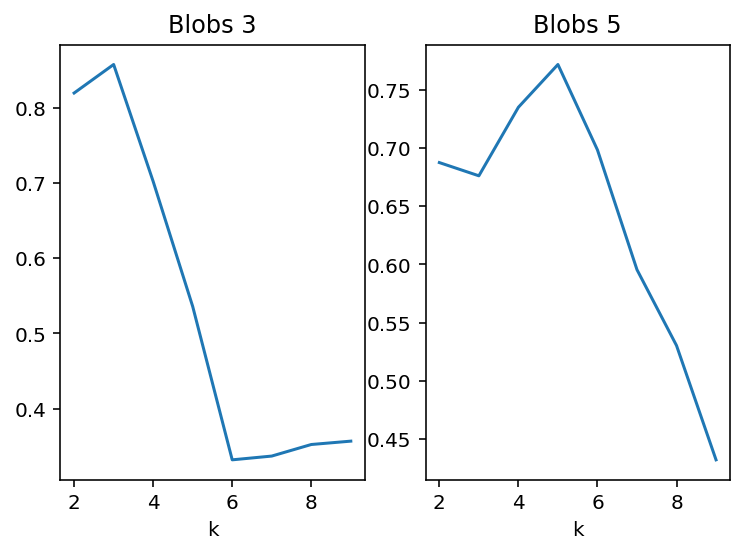

In [15]:
subplot(1, 2, 1)
plot_sillhouette(blobs_3, 'Blobs 3')
subplot(1, 2, 2)
plot_sillhouette(blobs_5, 'Blobs 5')

### Hierarchical clustering 

These algorithms have advantages like the posibility of generate dendograms, and it is not necesary that the cluster's number are known for make the analysis. Here, we are going to use the agglomerative approach of complete linkage.

The first step in the algorithm implementation is make the distance matrix. For simplify the results understanding, we are going to use the five firsts records of `blobs_3` dataset.

In [16]:
import pandas as pd
from sklearn.datasets        import make_blobs
from scipy.spatial.distance  import pdist, squareform
from scipy.cluster.hierarchy import linkage

In [17]:
# blobs_3 -> dataset
# classes_3 -> vector with the cluster's id of each point
blobs_3, classes_3 = make_blobs(300,                 # amount of data
                                centers      = 3,    # amount of clusters
                                cluster_std   = 0.5,  # standard desviation of data
                                random_state = 1)    # seed of random generator

In [18]:
# pdist is similar to cdist, but this method calculates the distance between all vector's points. 
#   cdist calculates the distance between vectors.
# squareform makes the distance matrix between all points.
data = pd.DataFrame(blobs_3[0:5,:])
row_dist = pd.DataFrame(squareform(pdist(data, metric = 'euclidean')))
row_dist

,0,1,2,3,4
0,0.000000,6.092759,0.833313,11.845115,12.017689
1,6.092759,0.000000,6.816534,13.609028,13.798075
2,0.833313,6.816534,0.000000,11.391524,11.559173
3,11.845115,13.609028,11.391524,0.000000,0.189181
4,12.017689,13.798075,11.559173,0.189181,0.000000


The second step is calculate the complete linkage agglomerative hierarchy clustering, using `linkage()` method 

In [19]:
row_clusters = linkage(pdist(data, metric = 'euclidean'),
                       method = 'complete')

pd.DataFrame(row_clusters,
             columns = ['row 1', 'row 2', 'distance', 'items in cluster'],
             index = ['cluster %d' %(i) for i in range(row_clusters.shape[0])] )

,row 1,row 2,distance,items in cluster
cluster 0,3.0,4.0,0.189181,2.0
cluster 1,0.0,2.0,0.833313,2.0
cluster 2,1.0,6.0,6.816534,3.0
cluster 3,5.0,7.0,13.798075,5.0


In this result, we can see that the `row 1` and `row 2` columns are the farthest elements of each group, the `distance` column is the distance between those elements and `items in cluster` column is the number of elements in the cluster. Once the linkage values are calculated, these can be represented in a dendrogram:

In [20]:
from scipy.cluster.hierarchy import dendrogram

{'color_list': ['g', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.18918149943571835, 0.18918149943571835, 0.0],
  [0.0, 0.83331337861939137, 0.83331337861939137, 0.0],
  [0.0, 6.8165337090690565, 6.8165337090690565, 0.83331337861939137],
  [0.18918149943571835,
   13.79807475234697,
   13.79807475234697,
   6.8165337090690565]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'ivl': ['3', '4', '1', '0', '2'],
 'leaves': [3, 4, 1, 0, 2]}

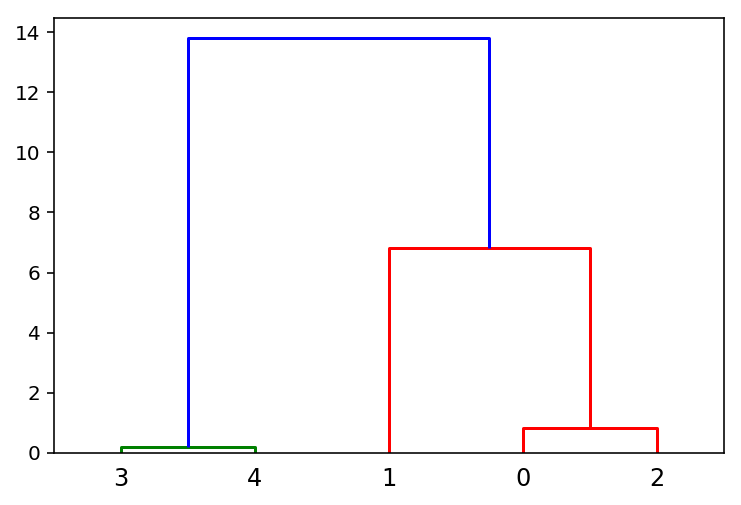

In [21]:
dendrogram(row_clusters)

With this result, we can say that the similarest elements, using the euclidean's distance, are the 3 and 4; and the followings are the 0 and 2.

This family of algorithms are not used like we have done, because `scikit-learn` has a implementation: `AgglomerativeClustering`. We are going to make the same analysis using the `scikit-learn` implementation

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
ac = AgglomerativeClustering(n_clusters = 2,         # Number of clusters
                             affinity = 'euclidean', # Euclidean's distance
                             linkage = 'complete')   # Complete linkage
ac.fit_predict(data)

array([0, 0, 0, 1, 1])

### DBSCAN - Density-Based Spatial Clustering of Applications with Noise 

The last one algorithm inside of the clustering analysis family is the `DBSCAN` algorithm. The density is the number of points which are on a $\epsilon$ radius of the point. The advantage of this algorithm is that it does not assume that the clusters don't have to be spherical. For that, it can be used to identify object with irregular forms. 

`scikit-learn` gives us this algorithm in `DBSCAN` object. Now, we are going to compare the three algorithms which we have studied:

In [24]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [25]:
km = KMeans(n_clusters = 3,
            random_state = 1).fit_predict(blobs_3)

ac = AgglomerativeClustering(n_clusters = 3,
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(blobs_3)

db = DBSCAN(eps = 0.6,       # epsilon radius
            min_samples = 5, # minimun of samples for considerate a point like a nucleus
            metric = 'euclidean').fit_predict(blobs_3)

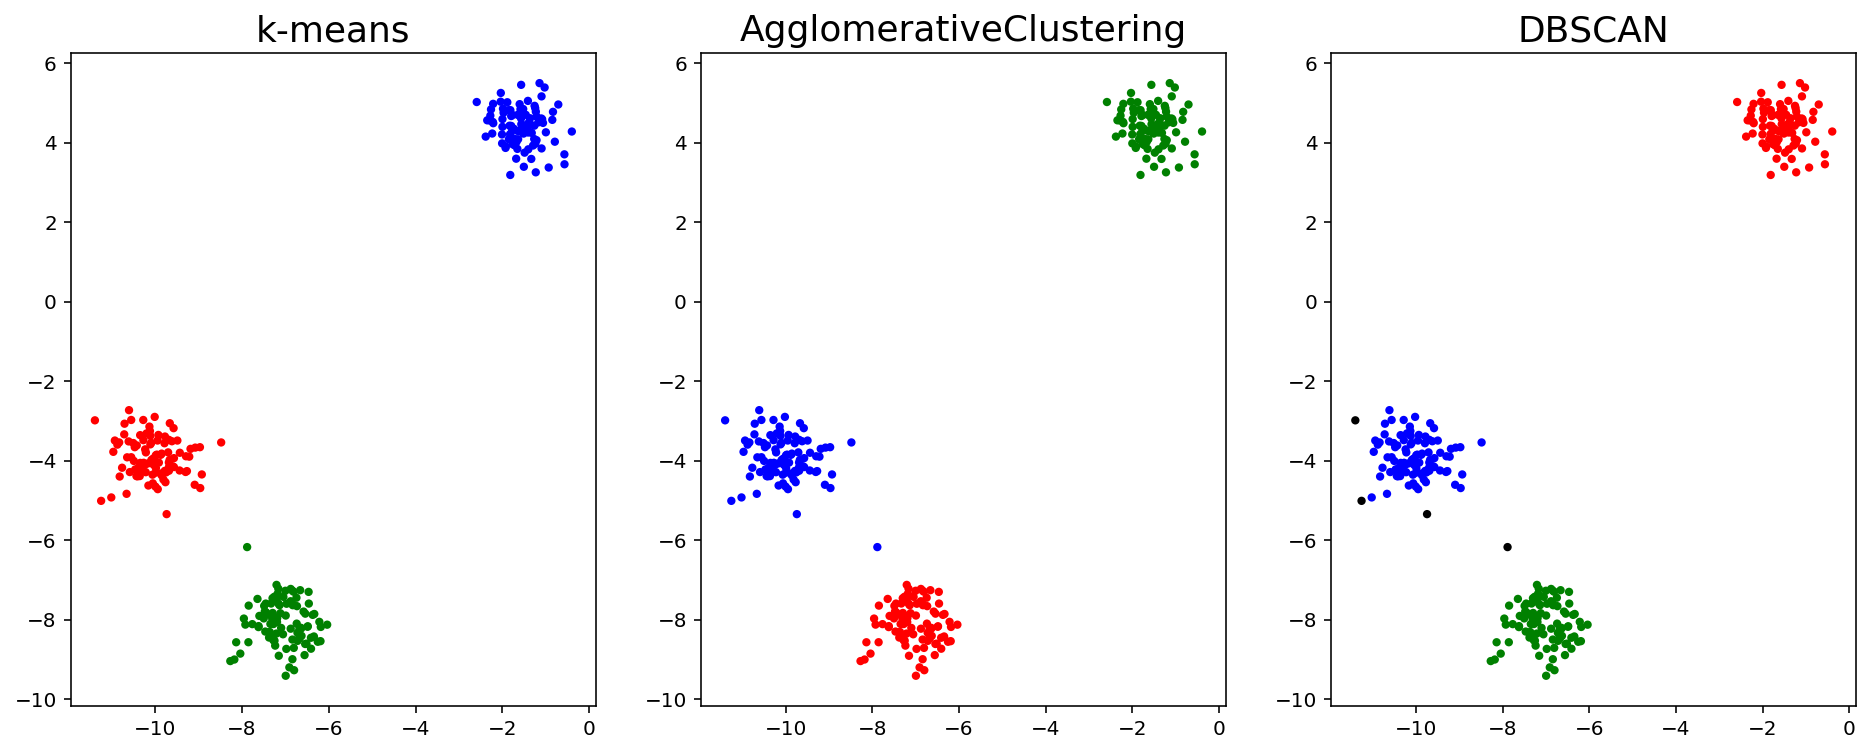

In [26]:
figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[km])
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[ac])
subplot(1, 3, 3)
plt.title('DBSCAN', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10, color = color_map[db])

In this result, we can observe that the three algorithms have seperated correctly the clustering, although some differences are between them: with `DBSCAN`, the black points exist because thoses are not associated with no cluster.

Let's compare the algorithms with another kind of problems: object with moon form. For that, let's use the `make_moons()` in `sklearn.datasets`:

In [27]:
from sklearn.datasets import make_moons
from sklearn.cluster  import KMeans
from sklearn.cluster  import AgglomerativeClustering
from sklearn.cluster  import DBSCAN

In [28]:
moons, moons_classes = make_moons(n_samples = 200,
                                  noise = 0.05,
                                  random_state = 1)

km = KMeans(n_clusters = 3,
            random_state = 1).fit_predict(moons)

ac = AgglomerativeClustering(n_clusters = 3,
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(moons)

db = DBSCAN(eps = 0.2,       # epsilon radius
            min_samples = 5, # minimun of samples for considerate a point like a nucleus
            metric = 'euclidean').fit_predict(moons)

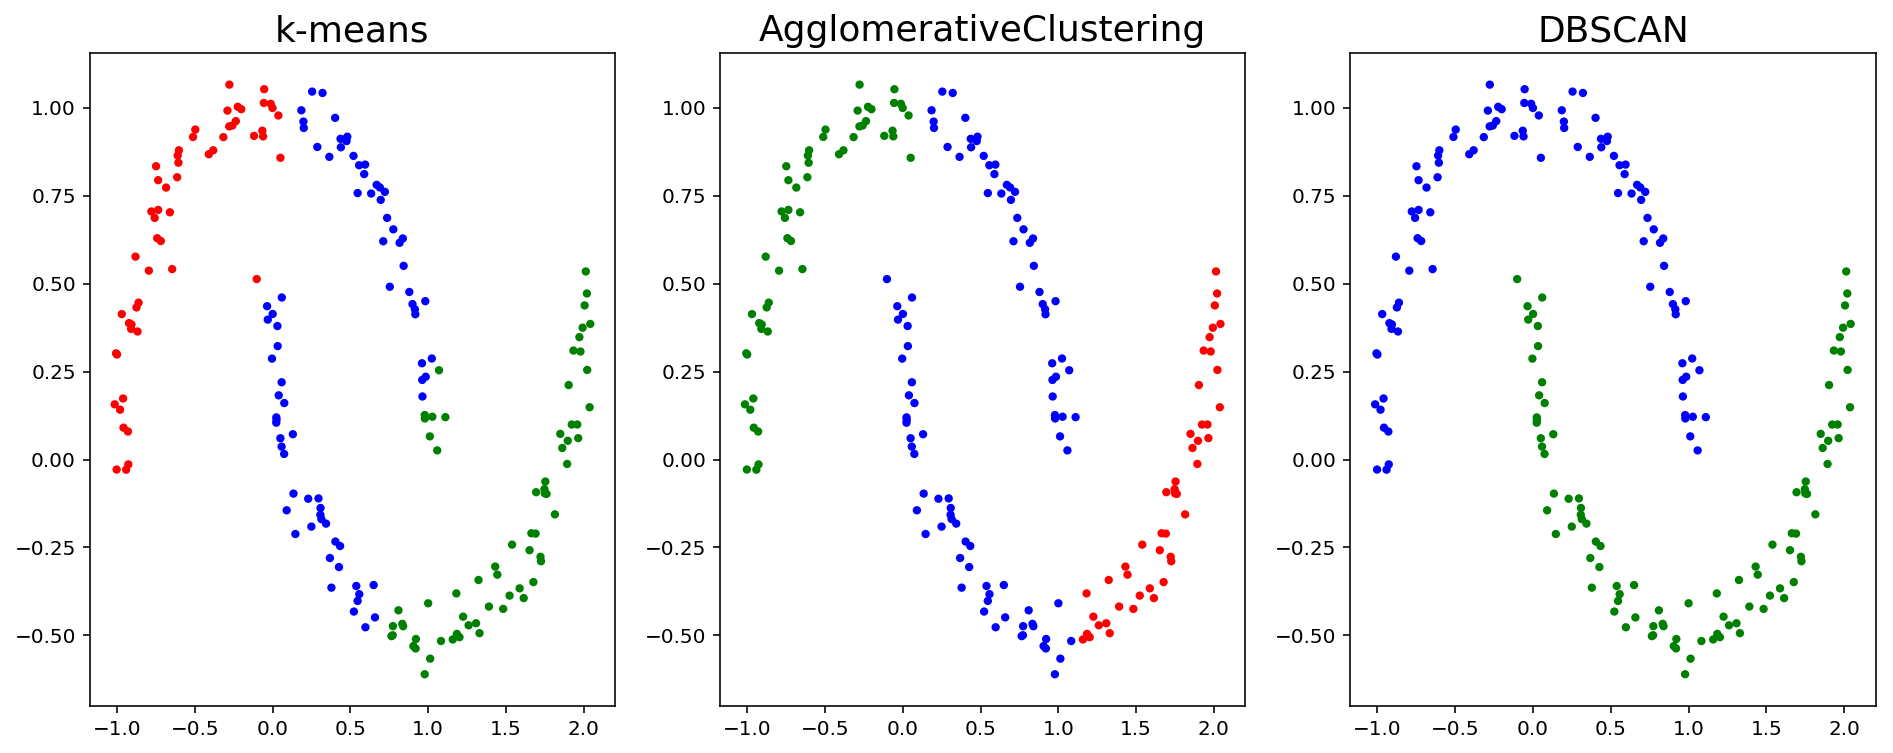

In [29]:
figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[km])
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[ac])
subplot(1, 3, 3)
plt.title('DBSCAN', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, color = color_map[db])

As we can observe, for that problems, the `DBSCAN` algorithm is better.

### Practical case

Use the `KMeans` algorithm for identify the outliers in a random dataset.

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster  import KMeans

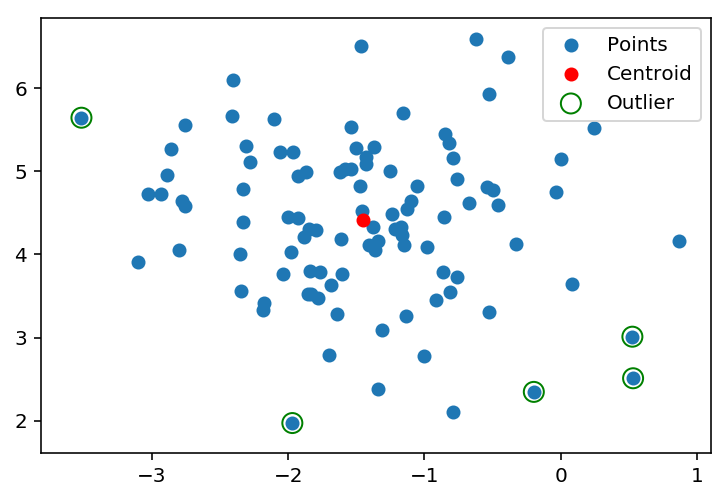

In [31]:
# Make blobs with 1 cluster
data, labels = make_blobs(100, centers = 1, random_state = 1)

# Create KMeans
kmeans = KMeans(n_clusters = 1, random_state = 1).fit(data)

# Transform data in cluster distances. These distances are ordered by decreasing the proximity of the cluster
distances = kmeans.transform(data)

# Order the distances and we get the last 5 points (outliers)
sorted_idx = argsort(distances.ravel())[::-1][:5]

# Display the points
scatter(data[:, 0], data[:, 1],
        label = 'Points')

# Display the centroids
scatter(kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
        label = 'Centroid',
        color = 'r')

# Display outliers
scatter(data[sorted_idx][:,0],
        data[sorted_idx][:,1],
        label = 'Outlier',
        edgecolors = 'g',
        facecolors = 'none',
        s = 100)
legend(loc = 'best')

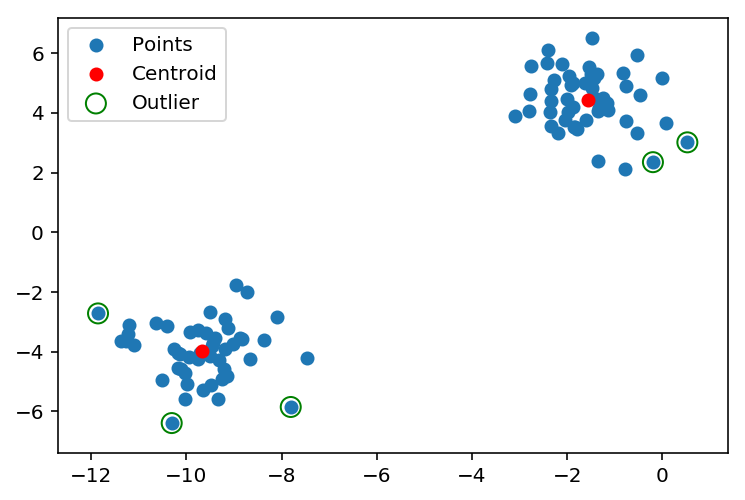

In [32]:
# Make blobs with 1 cluster
data, labels = make_blobs(100, centers = 2, random_state = 1)

# Create KMeans
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(data)

# Transform data in cluster distances. These distances are ordered by decreasing the proximity of the cluster
distances = kmeans.transform(data)

# Order the distances and we get the last 5 points (outliers)
sorted_idx = argsort(np.min(distances, axis = 1))[::-1][:5]

# Display the points
scatter(data[:, 0], data[:, 1],
        label = 'Points')

# Display the centroids
scatter(kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
        label = 'Centroid',
        color = 'r')

# Display outliers
scatter(data[sorted_idx][:,0],
        data[sorted_idx][:,1],
        label = 'Outlier',
        edgecolors = 'g',
        facecolors = 'none',
        s = 100)
legend(loc = 'best')